In [1]:
import pandas as pd 
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
import seaborn as sns
import yfinance as yf 

In [2]:
ativos = ['VIIA3.SA', 'JHSF3.SA', 'PETZ3.SA', 'B3SA3.SA','EZTC3.SA']

In [3]:
inicio = '2021-01-01'
fim = '2022-10-30'

In [32]:
yf.download('VIIA3.SA', start=inicio, end=fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed


Date
2021-01-04    16.170000
2021-01-05    16.219999
2021-01-06    15.490000
2021-01-07    15.080000
2021-01-08    15.530000
                ...    
2022-10-24     3.000000
2022-10-25     3.030000
2022-10-26     2.800000
2022-10-27     2.930000
2022-10-28     3.040000
Name: Adj Close, Length: 455, dtype: float64

In [30]:
df = pd.DataFrame()
df

""


In [6]:
for ativo in ativos:
  df[ativo] = yf.download(ativo, start=inicio, end=fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
df.head()

,VIIA3.SA,JHSF3.SA,PETZ3.SA,B3SA3.SA,EZTC3.SA
Date,,,,,
2021-01-04,16.170000,6.585738,18.517992,18.611401,39.196758
2021-01-05,16.219999,6.514924,18.527958,18.648027,38.256790
2021-01-06,15.490000,6.258221,17.581129,18.342821,36.705837
2021-01-07,15.080000,6.213962,17.461531,18.855564,36.019657
2021-01-08,15.530000,6.550331,18.069492,19.133305,38.012394


<AxesSubplot:xlabel='Date'>

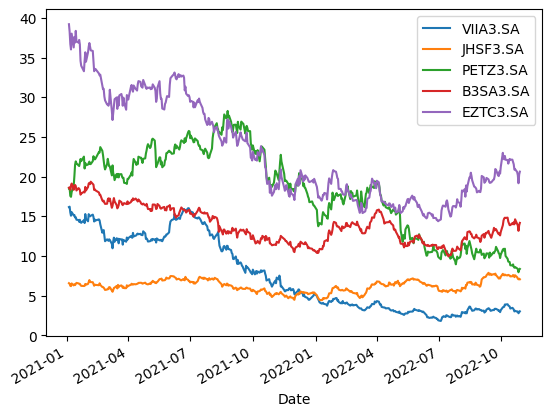

In [8]:
df.plot()

<AxesSubplot:xlabel='Date'>

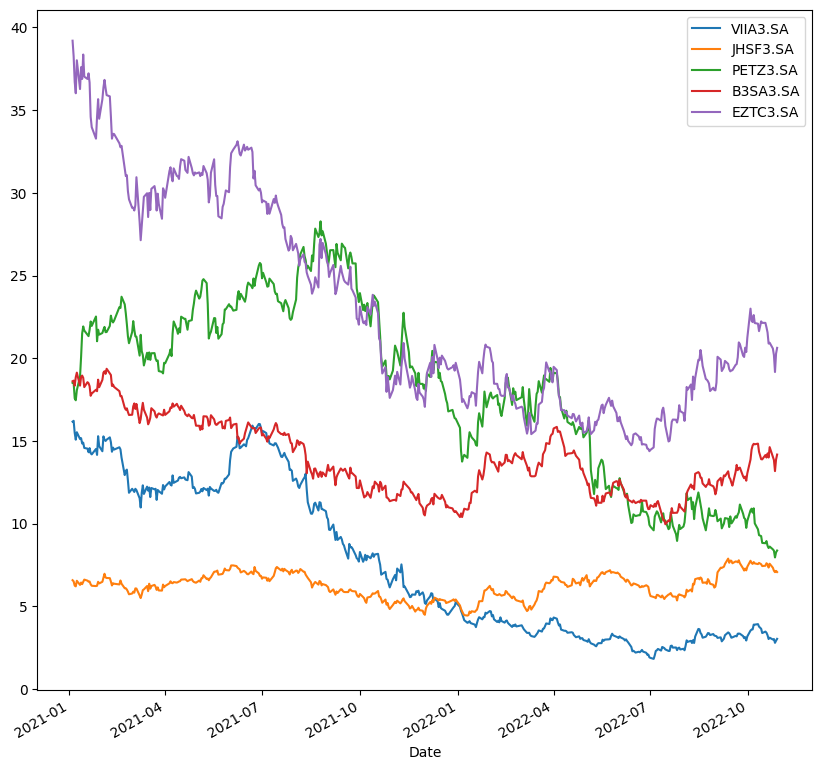

In [11]:
df.plot(figsize=(10,10))

In [15]:
df.iloc[0]

VIIA3.SA    16.170000
JHSF3.SA     6.585738
PETZ3.SA    18.517992
B3SA3.SA    18.611401
EZTC3.SA    39.196758
Name: 2021-01-04 00:00:00, dtype: float64

In [17]:
normalizado = df/df.iloc[0]
normalizado

,VIIA3.SA,JHSF3.SA,PETZ3.SA,B3SA3.SA,EZTC3.SA
Date,,,,,
2021-01-04,1.000000,1.000000,1.000000,1.000000,1.000000
2021-01-05,1.003092,0.989247,1.000538,1.001968,0.976019
2021-01-06,0.957947,0.950269,0.949408,0.985569,0.936451
2021-01-07,0.932591,0.943548,0.942949,1.013119,0.918945
2021-01-08,0.960421,0.994624,0.975780,1.028042,0.969784
...,...,...,...,...,...
2022-10-24,0.185529,1.114530,0.456313,0.754376,0.525299
2022-10-25,0.187384,1.087198,0.451993,0.744168,0.515094
2022-10-26,0.173160,1.073532,0.429852,0.708168,0.489071


<AxesSubplot:xlabel='Date'>

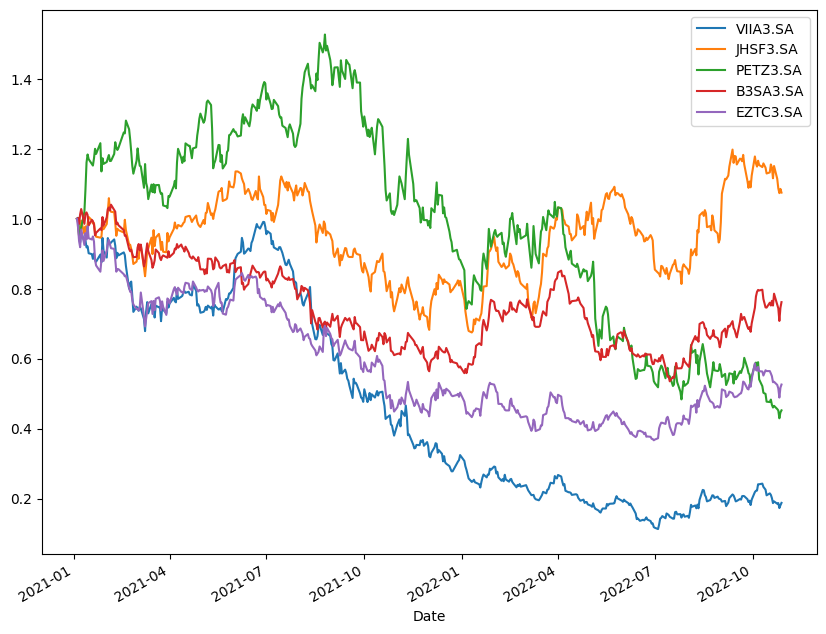

In [19]:
normalizado.plot(figsize=(10,8))

In [20]:
retornos_diarios = df.pct_change()
retornos_diarios.head()

,VIIA3.SA,JHSF3.SA,PETZ3.SA,B3SA3.SA,EZTC3.SA
Date,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.003092,-0.010753,0.000538,0.001968,-0.023981
2021-01-06,-0.045006,-0.039402,-0.051103,-0.016367,-0.040541
2021-01-07,-0.026469,-0.007072,-0.006803,0.027953,-0.018694
2021-01-08,0.029841,0.054131,0.034817,0.014730,0.055324


In [22]:
retornos_diarios.dropna(inplace=True)
retornos_diarios

,VIIA3.SA,JHSF3.SA,PETZ3.SA,B3SA3.SA,EZTC3.SA
Date,,,,,
2021-01-05,0.003092,-0.010753,0.000538,0.001968,-0.023981
2021-01-06,-0.045006,-0.039402,-0.051103,-0.016367,-0.040541
2021-01-07,-0.026469,-0.007072,-0.006803,0.027953,-0.018694
2021-01-08,0.029841,0.054131,0.034817,0.014730,0.055324
2021-01-11,-0.026401,-0.037838,0.045229,-0.041155,-0.045747
...,...,...,...,...,...
2022-10-24,-0.035370,-0.031662,-0.019722,-0.040328,-0.016714
2022-10-25,0.010000,-0.024523,-0.009467,-0.013533,-0.019427
2022-10-26,-0.075908,-0.012570,-0.048984,-0.048375,-0.050520


<AxesSubplot:xlabel='Date'>

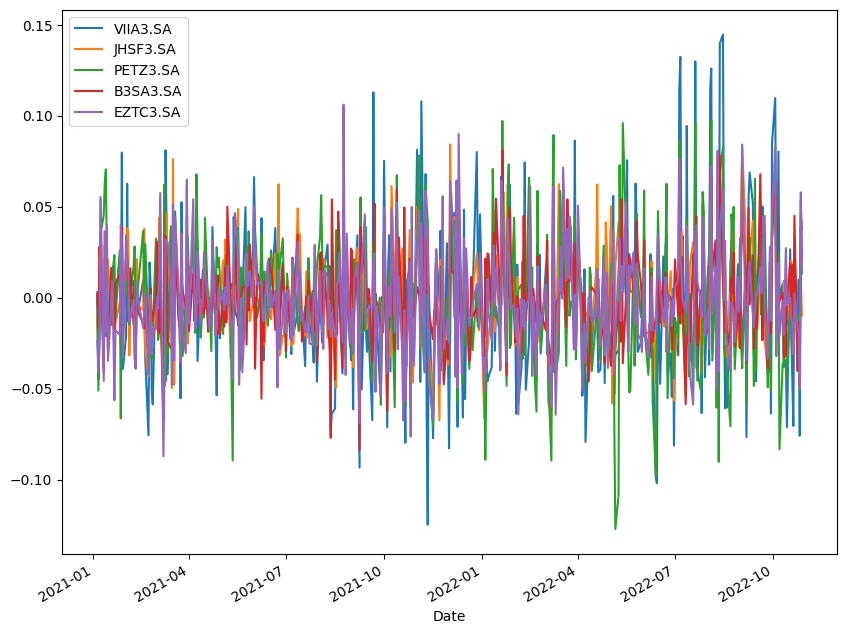

In [23]:
retornos_diarios.plot(figsize=(10,8))